# This is to compare the different two beam fields
First, import packages and create plotting standards

In [1]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
import os
import shutil
import scipy as sp
import sys
from matplotlib import gridspec
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import SymLogNorm
from matplotlib.colors import LogNorm

from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics

FontSize=25
FontSizeLabelAxis=25
rc('legend',fontsize=15)#fontsize=FontSize)
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
font = {'family' : 'normal',
        'size'   : FontSize}

rc('font', **font)
rc('text', usetex=True)

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3

cms = sp.constants.speed_of_light


## Now, define location of data

In [9]:
# Define which case we want to look at
base = '/lstr/sahara/aard/cphillips/manybunch/'

direc = 'squa/15587_Sqmanybunch/' # 64 64 1024; 20 pix/mm to 17 pix/mm
#direc = 'squa/15905_Sqmb_5nCw/' # witness is 5 nC 1.5 past 4th bunch
#direc = 'squa/15928_Sqmb_7nC7p7/' # witness is 7 nC 1.7 past 4th bunch
#direc = 'squa/15943_Sqmb_7nC8p5/' # witness is 7 nC 2.5 past 4th bunch
#direc = 'squa/16001_Sqmb_12nC9p5/' # witness is 12 nC 3.5 past 4th bunch

nbunch = 5
Nitera = -1



filedir = base+direc+'diags/slabmovingwarpx/'
txtdir = base+direc+'diags/reducedfiles/'
ts = LpaDiagnostics(filedir)

N_iterations = len(ts.iterations)

if Nitera==-1:
   it = ts.iterations[N_iterations-1]
else:
   it = ts.iterations[Nitera]


cases = ['d'+str(i) for i in np.arange(1,nbunch+1)]

In [10]:
# Get field information
Ez, info_Ez = ts.get_field( iteration=it,  field='E', coord='z',
                        slicing_dir='x', plot=False)
Ex, info_Ex = ts.get_field( iteration=it,  field='E', coord='x',
                        slicing_dir='x', plot=False)
Ey, info_Ey = ts.get_field( iteration=it,  field='E', coord='y',
                        slicing_dir='x', plot=False)
Bx, info_Bx = ts.get_field( iteration=it,  field='B', coord='x',
                        slicing_dir='x', plot=False)
By, info_By = ts.get_field( iteration=it,  field='B', coord='y',
                        slicing_dir='x', plot=False)

shapeEz = np.shape(Ez)
absmax=MV*max(np.max(np.max(np.abs(Ez))),np.abs(np.min(np.min(np.abs(Ez)))))
zsc=np.linspace(info_Ez.zmin*mm, info_Ez.zmax*mm, shapeEz[0])
print('z, y, x grid size: ',shapeEz)

# retrieve particle information
xs = []
ys = []
zs = []
pxf = []
pyf = []
pzf = []
for i in np.arange(nbunch):
    xf, yf, zf, px, py, pz = ts.get_particle(['x','y','z','ux','uy','uz'],  species=cases[i], iteration=it)
    xs.append(xf)
    ys.append(yf)
    zs.append(zf)
    pxf.append(px)
    pyf.append(py)
    pzf.append(pz)


# particle data
step = []
xmean = [] # m
ymean = [] # m 
zmean = [] # m
xrms = [] # m
yrms = [] # m
zrms = [] # m
grms = [] # no dim
emitx = [] # m
emity = [] # m
emitz = [] # m
zstructure = []

for i in np.arange(nbunch):
    f = open(txtdir+cases[i]+'.txt')
    dat = f.read().split("\n")

    header = dat[0]
    print('Available info in reduced diagnostics: ',header)

    ar = []
    [ ar.append(list(map(lambda x: float(x), row.split(" ")))) for row in dat[1:-1]]
    ar = np.array(ar)

    step.append(ar[:, 0])
    time = ar[:, 1] # s
    xmean.append(ar[:, 2]) # m
    ymean.append(ar[:, 3]) # m
    zmean.append(ar[:, 4]) # m
    xrms.append(ar[:, 9]) # m
    yrms.append(ar[:, 10]) # m
    zrms.append(ar[:, 11]) # m
    grms.append(ar[:,15])
    emitx.append(ar[:,16]) # m
    emity.append(ar[:,17]) # m
    emitz.append(ar[:,18]) # m

    zstructure.append(time*cms*mm) # mm

z, y, x grid size:  (1024, 64, 64)
Available info in reduced diagnostics:  #[0]step() [1]time(s) [2]x_mean(m) [3]y_mean(m) [4]z_mean(m) [5]px_mean(kg*m/s) [6]py_mean(kg*m/s) [7]pz_mean(kg*m/s) [8]gamma_mean() [9]x_rms(m) [10]y_rms(m) [11]z_rms(m) [12]px_rms(kg*m/s) [13]py_rms(kg*m/s) [14]pz_rms(kg*m/s) [15]gamma_rms() [16]emittance_x(m) [17]emittance_y(m) [18]emittance_z(m) [19]charge(C)
Available info in reduced diagnostics:  #[0]step() [1]time(s) [2]x_mean(m) [3]y_mean(m) [4]z_mean(m) [5]px_mean(kg*m/s) [6]py_mean(kg*m/s) [7]pz_mean(kg*m/s) [8]gamma_mean() [9]x_rms(m) [10]y_rms(m) [11]z_rms(m) [12]px_rms(kg*m/s) [13]py_rms(kg*m/s) [14]pz_rms(kg*m/s) [15]gamma_rms() [16]emittance_x(m) [17]emittance_y(m) [18]emittance_z(m) [19]charge(C)
Available info in reduced diagnostics:  #[0]step() [1]time(s) [2]x_mean(m) [3]y_mean(m) [4]z_mean(m) [5]px_mean(kg*m/s) [6]py_mean(kg*m/s) [7]pz_mean(kg*m/s) [8]gamma_mean() [9]x_rms(m) [10]y_rms(m) [11]z_rms(m) [12]px_rms(kg*m/s) [13]py_rms(kg*m/s) [14

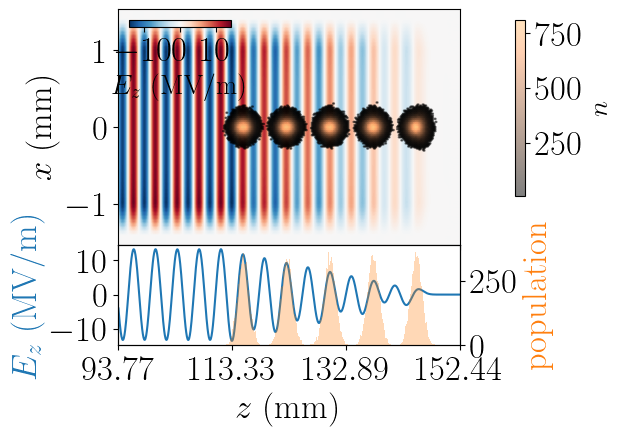

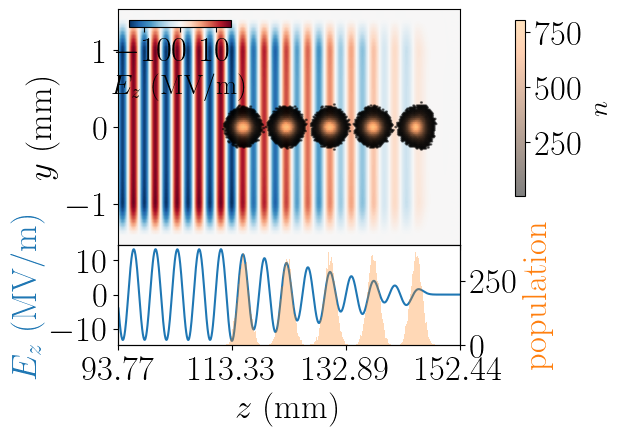

In [11]:
# generate a plot of the Ez wake in (z,y) with lineout of Ez
fig=plt.figure(9999)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])


# record Ez in the (z,x) plane for y=0
Ezslice=Ez[:,int(shapeEz[1]/2),:].transpose()*MV # gets the y=0 slice
shapeEzslice = np.shape(Ezslice)

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(Ezslice,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.xmin*mm,info_Ez.xmax*mm],
                   cmap='RdBu_r', vmin=-absmax, vmax=absmax, aspect='auto')
cbaxes = inset_axes(ax1, width="30%", height="3%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal').set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$x$ (mm)', fontsize=FontSizeLabelAxis)

# record particle and plot a histogram on top of 3d of Ez - NEED TO ADJUST AXES FOR THIS

ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)
# Line plot of Ez plus histogram of the population on lower plot
zsc=np.linspace(info_Ez.zmin*1e3, info_Ez.zmax*1e3, shapeEz[0])

ax2.plot (zsc,Ezslice[int(shapeEzslice[0]/2),:]) # gets the y=0 slice
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
lenz = info_Ez.zmax*mm-info_Ez.zmin*mm
xticklist = np.arange(info_Ez.zmin*mm,info_Ez.zmax*mm+lenz/2,lenz/3)
#print(xticklist)
ax2.set_xticks(xticklist)
ax22 = ax2.twinx()
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")
for i in np.arange(nbunch):
    particles=ax1.hexbin(zs[i]*mm, xs[i]*mm, gridsize=200,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.xmin*mm,info_Ez.xmax*mm], cmap='copper', alpha=0.5,  mincnt=5)
    ax22.hist(zs[i]*mm,shapeEz[0], alpha=0.3, color='C1')

cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9999)
#plt.savefig(save_dir+fig9999p,dpi=600)
plt.show()





#-------------------------------------------------------------------------
# record Ez in the (z,y) plane for x=0
fig=plt.figure(9998)
gs1 = gridspec.GridSpec(11, 13)
ax1 = fig.add_subplot(gs1[0:7,1:10])
ax2 = fig.add_subplot(gs1[7:10,1:10], sharex =ax1)
ax3 = fig.add_subplot(gs1[0:7,11:12])

# record Ez in the (z,y) plane for x=0
Ezslice=Ez[:,:,int(shapeEz[2]/2)].transpose()*MV # gets the x=0 slice
shapeEzslice = np.shape(Ezslice)

# plot slice (upper plot with red and blue lines)
imField=ax1.imshow(Ezslice,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.ymin*mm,info_Ez.ymax*mm],
                   cmap='RdBu_r', vmin=-absmax, vmax=absmax, aspect='auto')
cbaxes = inset_axes(ax1, width="30%", height="3%", loc=2)
cbar1  = fig.colorbar(imField, cax=cbaxes, orientation='horizontal').set_label(label=r'$E_z$ (MV/m)',size=20)
ax1.set_ylabel(r'$y$ (mm)', fontsize=FontSizeLabelAxis)

# record particle and plot a histogram on top of 3d of Ez
ax3.axis('off')
cbaxes2 = inset_axes(ax3, width="30%", height="75%", loc=2)


# Line plot of Ez plus histogram of the population on lower plot
zsc=np.linspace(info_Ez.zmin*mm, info_Ez.zmax*mm, shapeEz[0])
ax2.plot (zsc,Ezslice[int(shapeEzslice[0]/2),:]) # Ez slice has shape (ylen,zlen)
#ax2.plot (zsc,Ey[16,48,:]*1e-6)
#ax2.plot (zsc,Ex[16,48,:]*1e-6)
ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis, color="C0")
lenz = info_Ez.zmax*mm-info_Ez.zmin*mm
xticklist = np.arange(info_Ez.zmin*mm,info_Ez.zmax*mm+lenz/2,lenz/3)
ax2.set_xticks(xticklist)
ax22 = ax2.twinx()
ax22.set_ylabel(r'population', fontsize=FontSizeLabelAxis, color="C1")

for i in np.arange(nbunch):
    ax22.hist(zs[i]*mm,shapeEz[0], alpha=0.3, color='C1')
    particles=ax1.hexbin(zs[i]*mm, ys[i]*mm, gridsize=200,extent=[info_Ez.zmin*mm,info_Ez.zmax*mm, info_Ez.ymin*mm,info_Ez.ymax*mm], cmap='copper', alpha=0.5,  mincnt=5)

cbar2 = fig.colorbar(particles, cax=cbaxes2).set_label(label=r'$n$ ',size=20)

# Set up the plots
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(hspace=.0)

# Save the plot to be viewed
#plt.savefig(save_dir+fig9998)
#plt.savefig(save_dir+fig9998p,dpi=600)
plt.show()



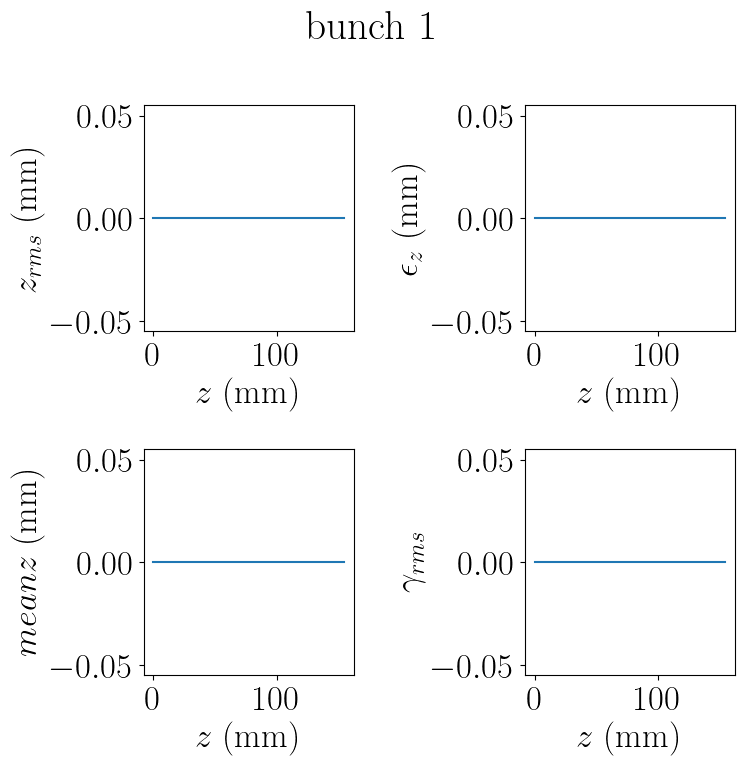

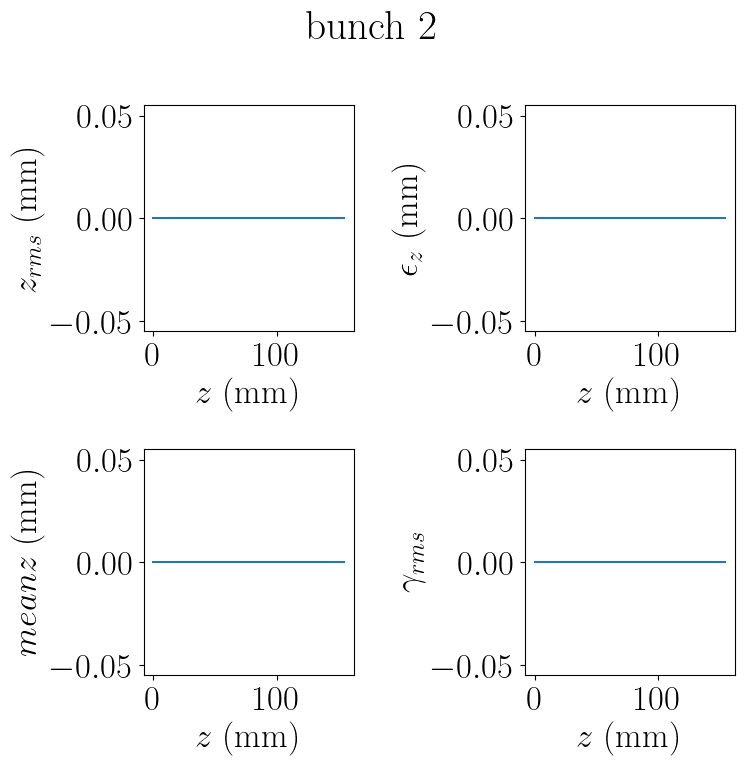

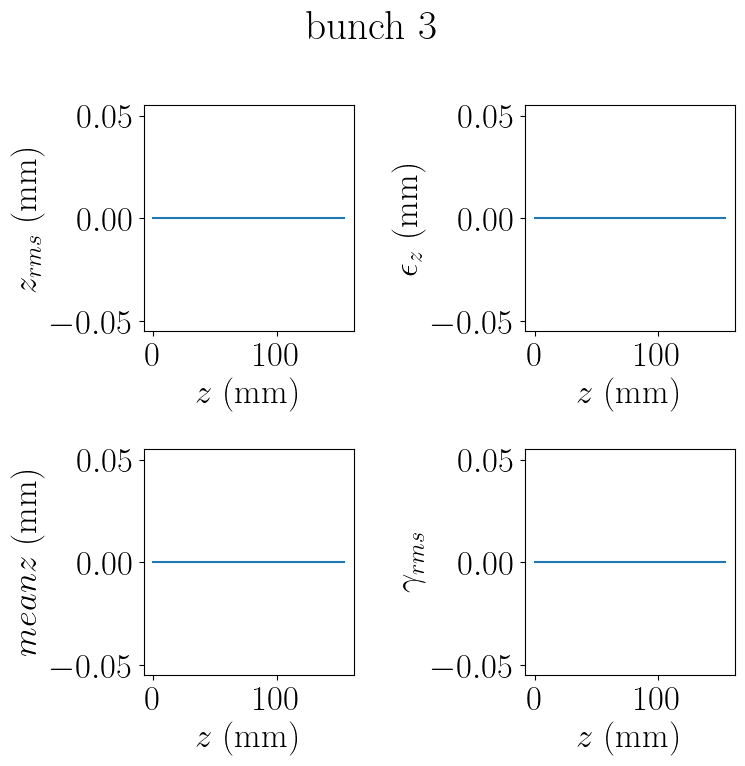

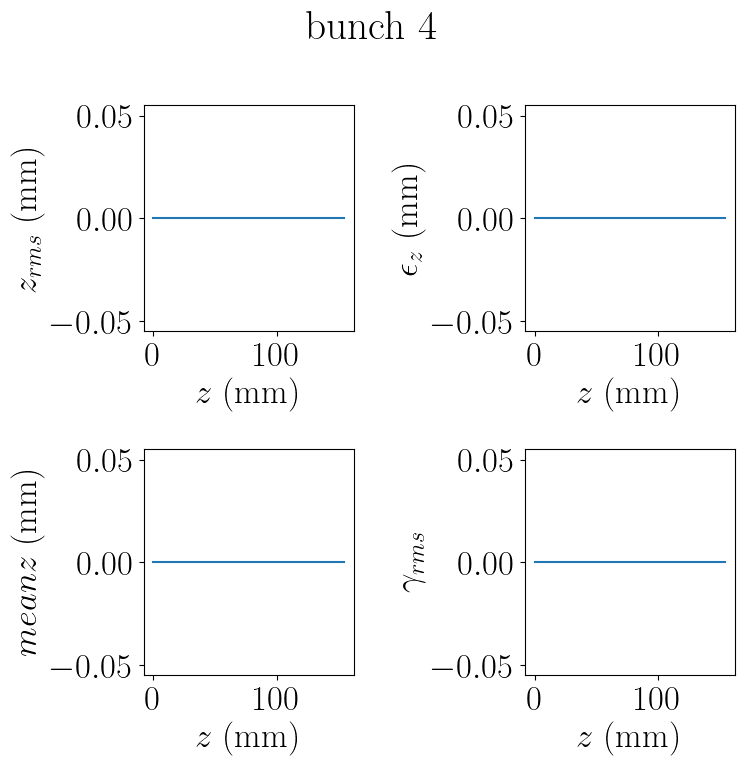

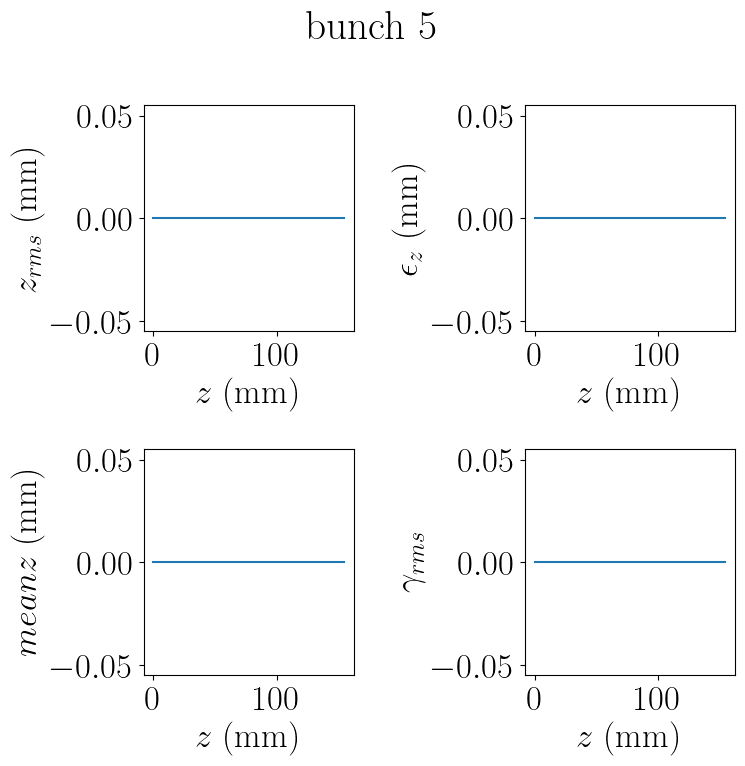

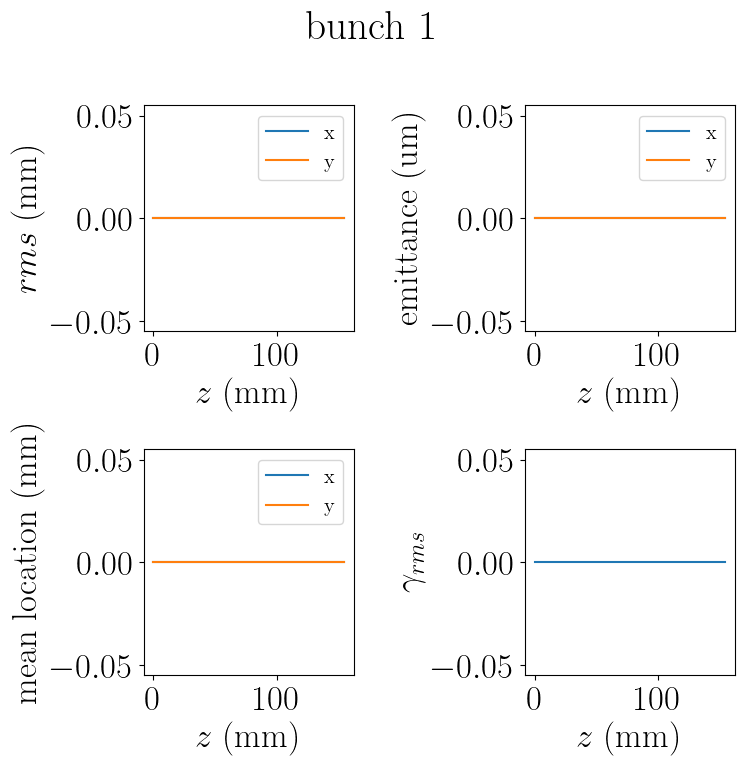

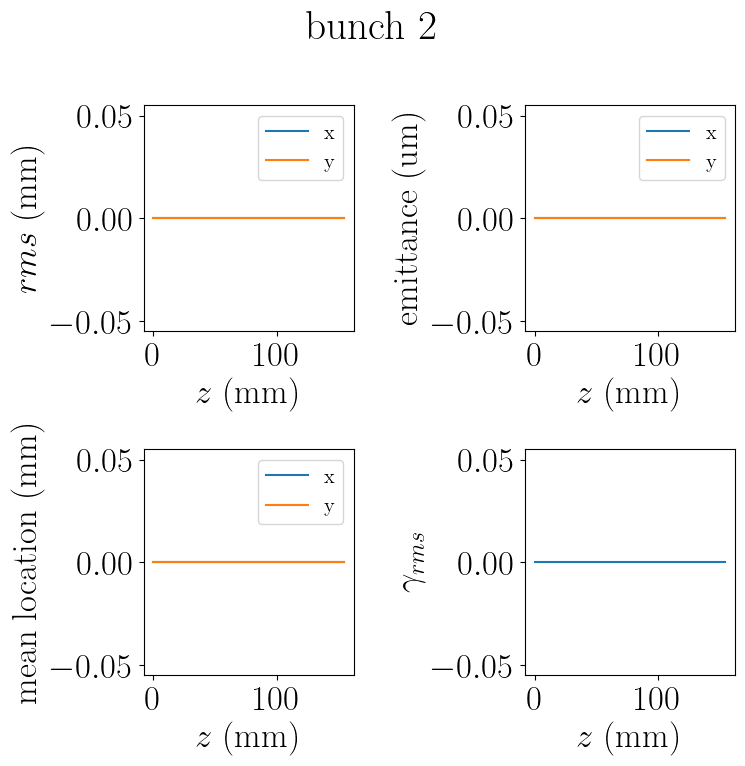

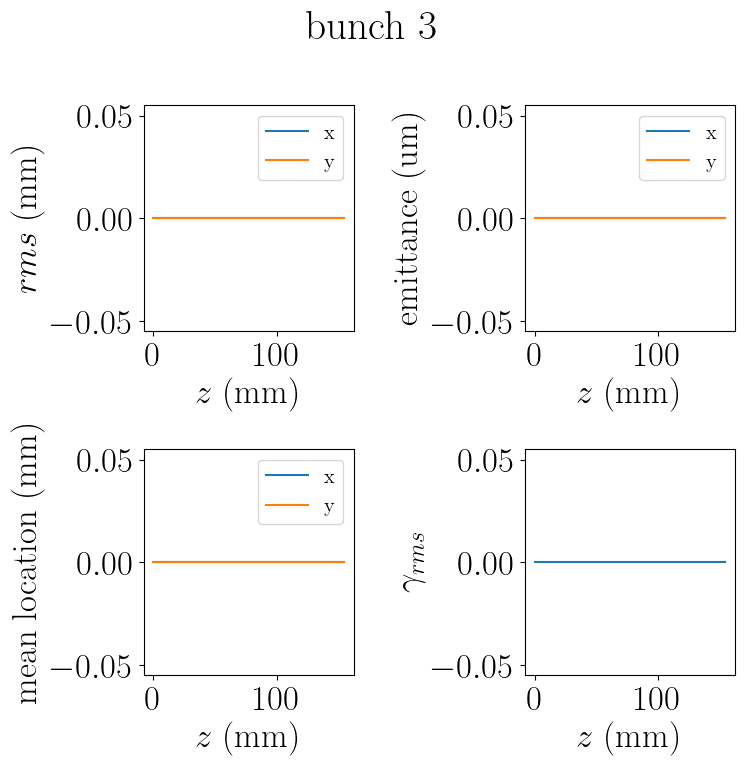

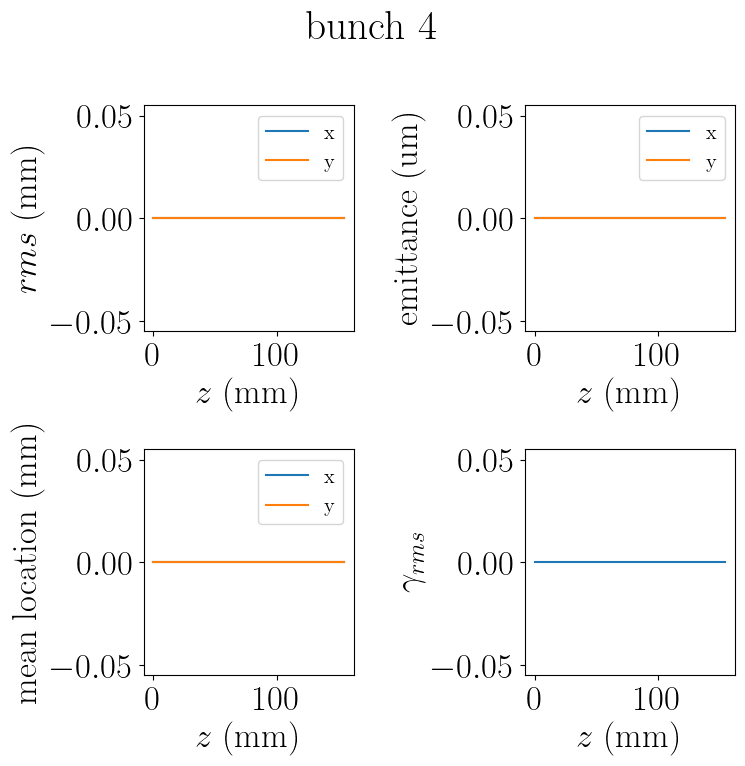

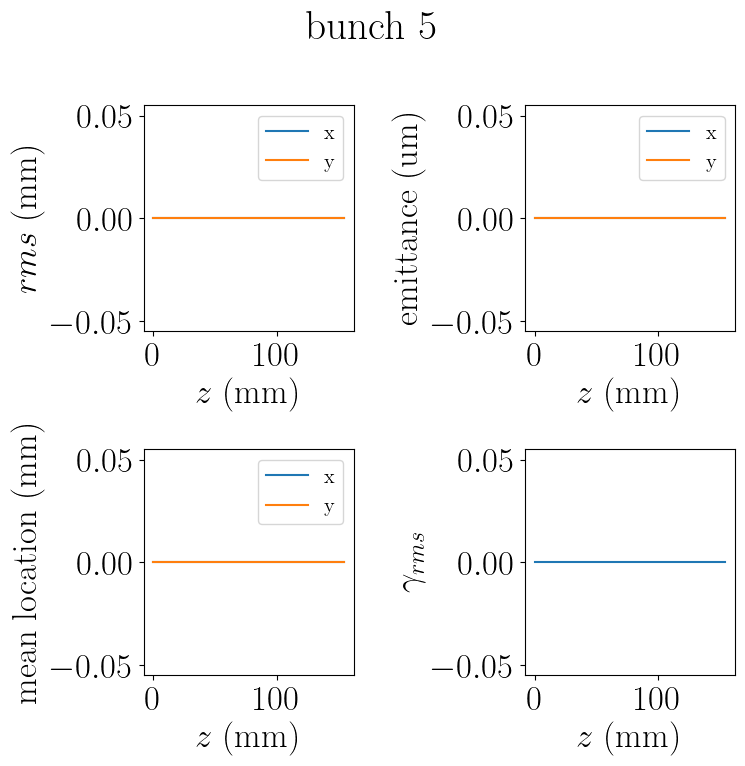

In [5]:

for i in np.arange(nbunch):
    fig, axlist = plt.subplots(2,2,figsize=(8,8))
    fig.suptitle('bunch '+str(i+1))
    ax1 = axlist[0,0]
    ax1.plot(zstructure[i],zrms[i]*mm)
    ax1.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax1.set_ylabel(r'$z_{rms}$ (mm)', fontsize=FontSizeLabelAxis)

    emitxu = emitx[i]*1e6
    emityu = emity[i]*1e6
    emitzu = emitz[i]*1e6

    ax2 = axlist[0,1]
    ax2.plot(zstructure[i],emitzu)
    ax2.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax2.set_ylabel(r'$\epsilon_z$ (mm)', fontsize=FontSizeLabelAxis)

    ax3 = axlist[1,0]
    ax3.plot(zstructure[i],zmean[i]*mm)
    ax3.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax3.set_ylabel(r'$mean z$ (mm)', fontsize=FontSizeLabelAxis)

    ax4 = axlist[1,1]
    ax4.plot(zstructure[i],grms[i])
    ax4.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax4.set_ylabel(r'$\gamma_{rms}$',fontsize=FontSizeLabelAxis)
    plt.tight_layout()
    fig.show()


for i in np.arange(nbunch):
    fig, axlist = plt.subplots(2,2,figsize=(8,8))
    fig.suptitle('bunch '+str(i+1))
    ax12 = axlist[0,0]
    ax12.plot(zstructure[i],xrms[i]*mm,label='x')
    ax12.plot(zstructure[i],yrms[i]*mm,label='y')
    ax12.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax12.set_ylabel(r'$rms$ (mm)',fontsize=FontSizeLabelAxis)
    ax12.legend()


    emitxu = emitx[i]*1e6
    emityu = emity[i]*1e6
    emitzu = emitz[i]*1e6

    ax22 = axlist[0,1]
    ax22.plot(zstructure[i],emitxu,label='x')
    ax22.plot(zstructure[i],emityu,label='y')
    ax22.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax22.set_ylabel('emittance (um)',fontsize=FontSizeLabelAxis)
    ax22.legend()


    ax32 = axlist[1,0]
    ax32.plot(zstructure[i],xmean[i]*mm,label='x')
    ax32.plot(zstructure[i],ymean[i]*mm,label='y')
    ax32.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax32.set_ylabel('mean location (mm)',fontsize=FontSizeLabelAxis)
    ax32.legend()


    ax4 = axlist[1,1]
    ax4.plot(zstructure[i],grms[i])
    ax4.set_xlabel(r'$z$ (mm)', fontsize=FontSizeLabelAxis)
    ax4.set_ylabel(r'$\gamma_{rms}$',fontsize=FontSizeLabelAxis)
    plt.tight_layout()
    fig.show()





130.51229934753434 155.57822832132976


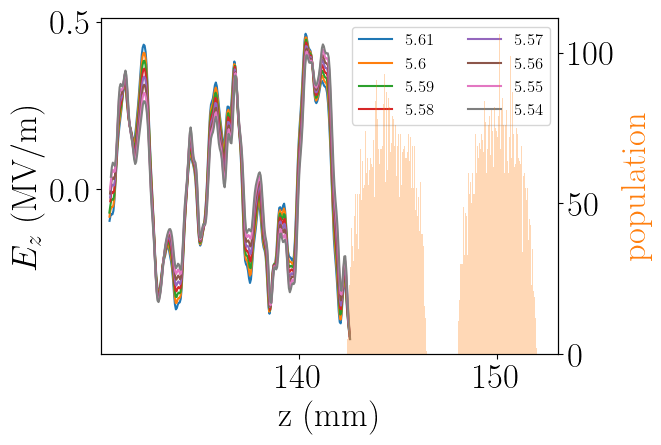

In [4]:
distance = 247
dis = [5.61, 5.60, 5.59, 5.58, 5.57, 5.56, 5.55, 5.54]
print(zsc[0],zsc[-1])


fig=plt.figure(9998)
gs1 = gridspec.GridSpec(11, 13)
ax2 = fig.add_subplot(gs1[0:10,1:13])


for i in np.arange(len(cases)):
    ax2.plot(zs[i][:distance],Ezdata[i][:distance], label=str(dis[i]))

ax2.set_xlim([zsc[0]-.5,zsc[-1]-2.5])
ax2.set_xlabel('z (mm)', fontsize=FontSizeLabelAxis)
ax2.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis)
ax2.legend(ncol=2,loc='upper right',fontsize=12)

ax22 = ax2.twinx()
ax22.hist(dzf*mm,512, alpha=0.3, color='C1')
ax22.hist(wzf*mm,512, alpha=0.3, color='C1')
ax22.set_ylabel(r'population',fontsize=FontSizeLabelAxis, color="C1")


#plt.setp(ax2.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
plt.show()

130.51229934753434 142.62831589651177


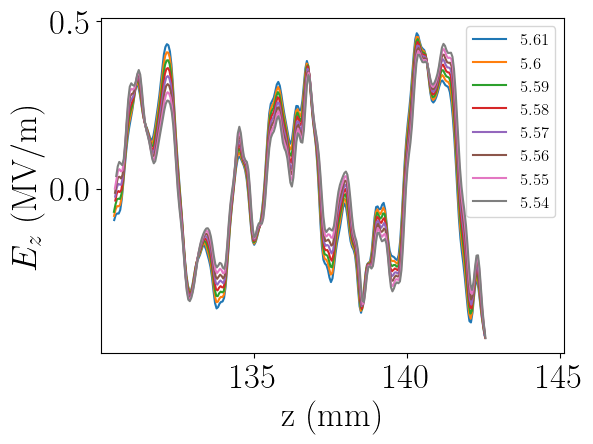

In [5]:
distance = 247
dis = [5.61, 5.60, 5.59, 5.58, 5.57, 5.56, 5.55, 5.54]
print(zsc[0],zsc[distance])

fig=plt.figure(9998)
gs1 = gridspec.GridSpec(11, 15)
ax1 = fig.add_subplot(gs1[0:10,1:15])

for i in np.arange(len(cases)):
    ax1.plot(zs[i][:distance],Ezdata[i][:distance], label=str(dis[i]))

ax1.set_xlim([zsc[0]-.5,zsc[distance]+2.5])
ax1.set_xlabel('z (mm)', fontsize=FontSizeLabelAxis)
ax1.set_ylabel(r'$E_z$ (MV/m) ', fontsize=FontSizeLabelAxis)
ax1.legend(loc='upper right',fontsize=12)
plt.show()

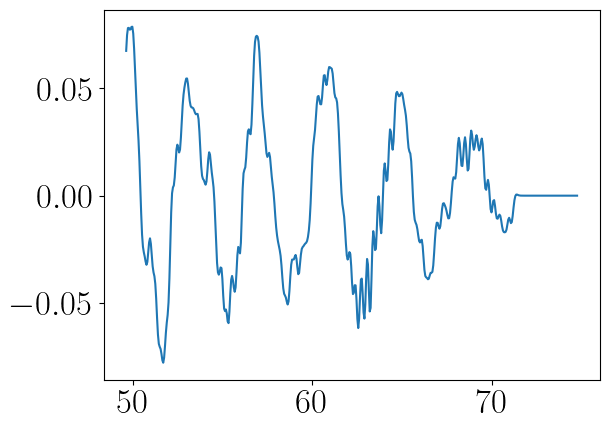

In [49]:
# this is a test to see about subtracting the 5.61 mm difference case from the 5.58 mm difference case 
E30 = Ezdata[3] - Ezdata[0]
plt.plot(zsc,E30)
plt.show()